In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galaxy Color Distribution

In [2]:
from astropy.table import Table
t_1 = Table.read('../data/sample_1_g_minus_r.dat', format='ascii')
t_2 = Table.read('../data/sample_2_g_minus_r.dat', format='ascii')
t_3 = Table.read('../data/sample_3_g_minus_r.dat', format='ascii')
t_4 = Table.read('../data/sample_4_g_minus_r.dat', format='ascii')
t_5 = Table.read('../data/sample_5_g_minus_r.dat', format='ascii')
t_6 = Table.read('../data/sample_6_g_minus_r.dat', format='ascii')
t_7 = Table.read('../data/sample_7_g_minus_r.dat', format='ascii')
t_8 = Table.read('../data/sample_8_g_minus_r.dat', format='ascii')
t_9 = Table.read('../data/sample_9_g_minus_r.dat', format='ascii')
t_10 = Table.read('../data/sample_10_g_minus_r.dat', format='ascii')
t_11 = Table.read('../data/sample_11_g_minus_r.dat', format='ascii')
t_12 = Table.read('../data/sample_12_g_minus_r.dat', format='ascii')
t_13 = Table.read('../data/sample_13_g_minus_r.dat', format='ascii')
t_14 = Table.read('../data/sample_14_g_minus_r.dat', format='ascii')
t_15 = Table.read('../data/sample_15_g_minus_r.dat', format='ascii')

# magnitude bins
mag_bins = np.arange(-24, -16.99, 0.25)[::-1]
mag_bin_centers = (mag_bins[:-1]+mag_bins[1:])/2.0
N_mag_bins = len(mag_bins)-1

print("number of magnitude bins: ", N_mag_bins)

# color bins
color_bins = np.arange(0,1.5001,0.05)
color_bin_centers = (color_bins[:-1]+color_bins[1:])/2.0

number of magnitude bins:  28


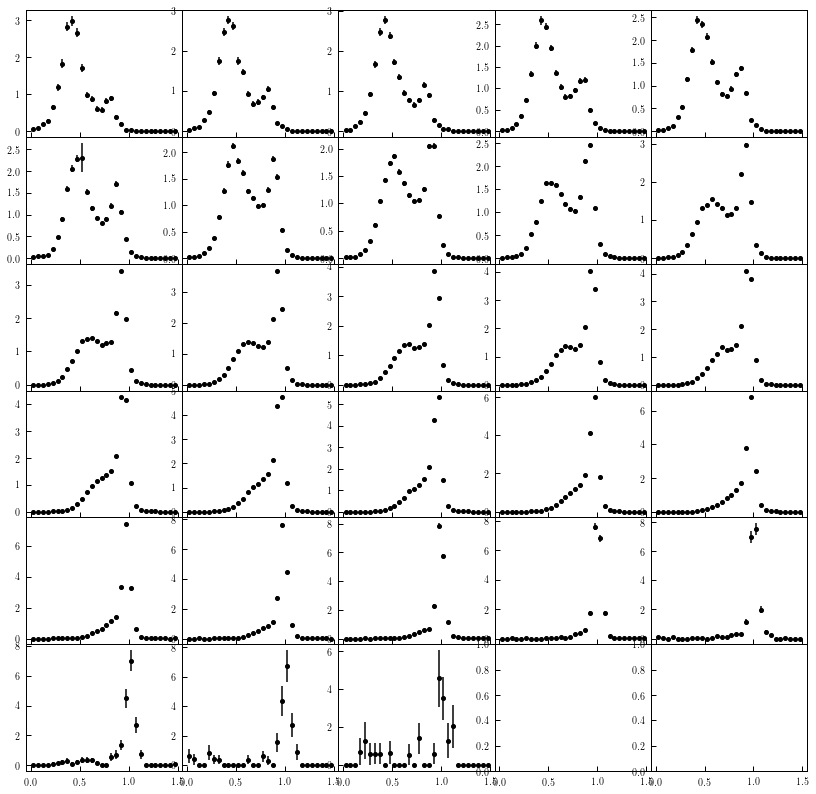

In [3]:
# row and column sharing
fig, axes = plt.subplots(6, 5, sharex=True, sharey=False, figsize=(14.0,14.0))
axes = axes.flatten()
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(0,28):
    
    ax = axes[i]
    
    t = Table.read('../data/sample_'+str(int(i))+'_g_minus_r.dat', format='ascii')
    
    x0 = t['g_minus_r']
    y0 = t['frequency']
    y0_err = t['err']
    ax.errorbar(x0,y0,y0_err,fmt='o', ms=4, color='black')
    
plt.show()

# fit double gaussian model

In [92]:
from scipy.stats import norm, exponnorm
from scipy.optimize import leastsq, minimize, curve_fit

def model_pdf_1(x, loc, scale):
    """
    late type model
    """
    k = 1.0/(scale*7.1765)
    return exponnorm.pdf(x, k, loc, scale)

def model_pdf_2(x, loc, scale):
    """
    early type model
    """
    return norm.pdf(x, loc, scale)

def total_pdf(x, loc1, scale1, loc2, scale2, f):
    """
    """
    return f*model_pdf_1(x, loc1, scale1) +\
           (1.0-f)*model_pdf_2(x, loc2, scale2)

def chi_2(theta, x, y, yerr):
    """
    """
    y_model = total_pdf(x, *theta)
    
    mask = yerr>0.0
    
    d = ((y-y_model)/yerr)**2
    return np.sum(d[mask])

bounds = ([0,1],[0.01,0.2],[0.5,1.5],[0.01,0.2],[0,1])

/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


(0.01, 5)

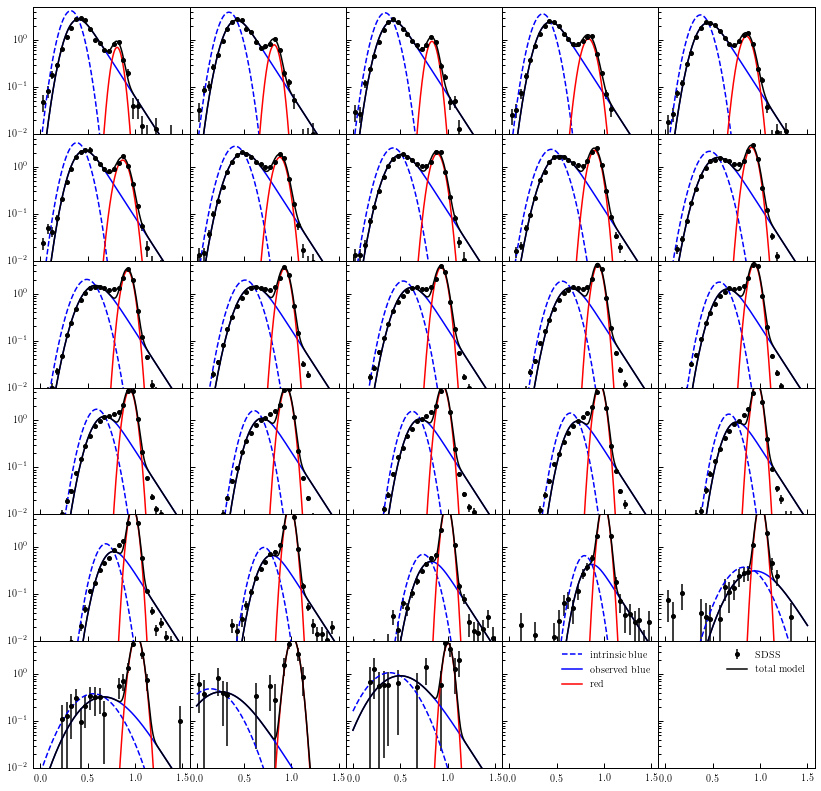

In [110]:
# row and column sharing
fig, axes = plt.subplots(6, 5, sharex=True, sharey=True, figsize=(14.0,14.0))
axes = axes.flatten()
plt.subplots_adjust(wspace=0, hspace=0)

x_sample = np.linspace(0,1.5,1000)

N = len(mag_bin_centers)
m1s = np.zeros(N)
m2s = np.zeros(N)
s1s = np.zeros(N)
s2s = np.zeros(N)
fs = np.zeros(N)

ferrs = np.zeros(N)
m1errs = np.zeros(N)
m2errs = np.zeros(N)
s1errs = np.zeros(N)
s2errs = np.zeros(N)

for i, mag in enumerate(mag_bin_centers):
    
    m1 = color_model.lt_mean_color(mag)
    m2 = color_model.et_mean_color(mag)
    s1 = color_model.lt_scatter_color(mag)
    s2 = color_model.et_scatter_color(mag)
    f = blue_fraction(mag)
    theta0 = [m1, s1, m2, s2, f]
   
    t = Table.read('../data/sample_'+str(int(i))+'_g_minus_r.dat', format='ascii')

    x = t['g_minus_r']
    y = t['frequency']
    yerr = t['err']
    
    res = minimize(chi_2, theta0, args=(x, y, yerr), bounds=bounds)
    theta = res.x
    
    ax = axes[i]
    
    p1 = ax.errorbar(x,y,yerr,fmt='o', ms=4, color='black')
    
    f = theta[4]
    
    m1 = theta[0]
    s1 = theta[1]
    k = 1.0/(s1*7.1765)
    l2, = ax.plot(x_sample, f*exponnorm.pdf(x_sample, k, m1, s1), color='blue')
    l3, = ax.plot(x_sample, f*norm.pdf(x_sample, m1, s1), '--', color='blue')
    
    m2 = theta[2]
    s2 = theta[3]
    l4, = ax.plot(x_sample, (1.0-f)*norm.pdf(x_sample, m2, s2), color='red')
    
    l1, = ax.plot(x_sample, f*exponnorm.pdf(x_sample, k, m1, s1) + (1.0-f)*norm.pdf(x_sample, m2, s2), color='black')
    
    fs[i] = f
    m1s[i] = m1
    m2s[i] = m2
    s1s[i] = s1
    s2s[i] = s2 
    
    mask = (yerr==0)
    yerr[mask] = 0.001
    
    theta0 = [m1, s1, m2, s2, f]
    res = curve_fit(total_pdf, x, y, p0=theta0, sigma=yerr)
    pcov = res[1]
    perr = np.sqrt(np.diag(pcov))
    
    ferrs[i] = perr[4] 
    
    m1errs[i] = perr[0] 
    m2errs[i] = perr[2] 
    
    s1errs[i] = perr[1] 
    s2errs[i] = perr[3] 

ax = axes[-2]
ax.legend([l3,l2,l4],['intrinsic blue','observed blue','red'], frameon=False)
    
ax = axes[-1]
ax.legend([p1, l1],['SDSS','total model'], frameon=False)

ax.set_yscale('log')
ax.set_ylim([0.01,5])

(-2, 2)

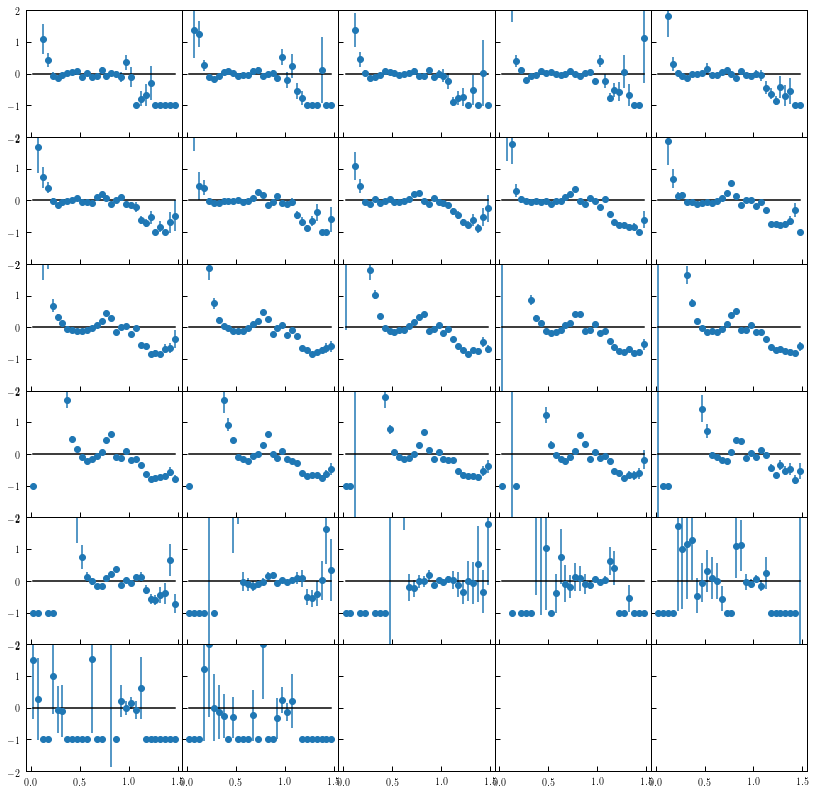

In [104]:
# row and column sharing
fig, axes = plt.subplots(6, 5, sharex=True, sharey=True, figsize=(14.0,14.0))
axes = axes.flatten()
plt.subplots_adjust(wspace=0, hspace=0)

for i, mag in enumerate(mag_bin_centers):
    
    m1 = color_model.lt_mean_color(mag)
    m2 = color_model.et_mean_color(mag)
    s1 = color_model.lt_scatter_color(mag)
    s2 = color_model.et_scatter_color(mag)
    f = blue_fraction(mag)
    theta0 = [m1, s1, m2, s2, f]
   
    t = Table.read('../data/sample_'+str(int(i))+'_g_minus_r.dat', format='ascii')

    x = t['g_minus_r']
    y = t['frequency']
    yerr = t['err']
    
    f = fs[i]
    m1 = m1s[i]
    m2 = m2s[i]
    s1 = s1s[i]
    s2 = s2s[i]
    k = 1.0/(s1*7.1765)
    
    y_model = f*exponnorm.pdf(x, k, m1, s1) + (1.0-f)*norm.pdf(x, m2, s2)
    
    ax.plot(x, x*0.0, '-', color='black')
    ax.errorbar(x, (y-y_model)/y_model, yerr/y_model, fmt='o')
    
    ax = axes[i]
    
ax.set_ylim([-2,2])   

In [126]:
theta0 = [-21.5, 1.5]
theta_f = curve_fit(blue_fraction, mag_bin_centers, fs, p0=theta0, sigma=ferrs)[0]

theta0 = [-0.10301, -1.37177]
def linear_model(x, m, b):
    return m*x + b
theta_m1 = curve_fit(linear_model, mag_bin_centers, m1s, p0=theta0, sigma=m1errs)[0]

theta0 = [-0.03347, 0.246085]
def linear_model(x, m, b):
    return m*x + b
theta_m2 = curve_fit(linear_model, mag_bin_centers, m2s, p0=theta0, sigma=m2errs)[0]

theta0 = [0.2,]
def const_model(x, b):
    return 0.0*x + b
theta_s1 = curve_fit(const_model, mag_bin_centers, s1s, p0=theta0, sigma=s1errs)[0]

theta0 = [-0.1,0.1]
def linear_model(x, m, b):
    return m*x + b
theta_s2 = curve_fit(linear_model, mag_bin_centers, s2s, p0=theta0, sigma=s2errs)[0]

(0, 0.2)

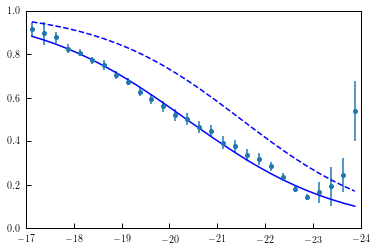

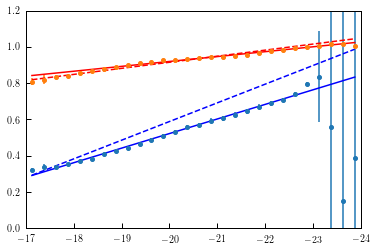

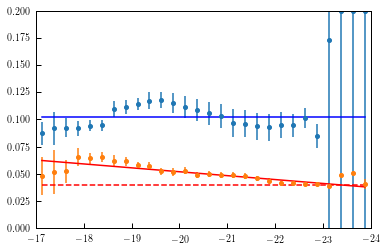

In [129]:
plt.figure()
plt.plot(mag_bin_centers, blue_fraction(mag_bin_centers), '--', color='blue')
plt.plot(mag_bin_centers, blue_fraction(mag_bin_centers, *theta_f), color='blue')
plt.errorbar(mag_bin_centers, fs,ferrs, fmt='o', ms=4)
plt.xlim([-17,-24])
plt.ylim([0,1])

plt.figure()
plt.plot(mag_bin_centers, color_model.lt_mean_color(mag_bin_centers), '--', color='blue')
plt.plot(mag_bin_centers, linear_model(mag_bin_centers, *theta_m1), '-', color='blue')
plt.errorbar(mag_bin_centers, m1s, m1errs, fmt='o', ms=4)
plt.plot(mag_bin_centers, color_model.et_mean_color(mag_bin_centers), '--', color='red')
plt.plot(mag_bin_centers, linear_model(mag_bin_centers, *theta_m2), '-', color='red')
plt.errorbar(mag_bin_centers, m2s, m2errs, fmt='o', ms=4)
plt.xlim([-17,-24])
plt.ylim([0,1.2])

plt.figure()
plt.plot(mag_bin_centers, color_model.lt_scatter_color(mag_bin_centers),' --', color='blue')
plt.plot(mag_bin_centers, const_model(mag_bin_centers, *theta_s1), '-', color='blue')
plt.errorbar(mag_bin_centers, s1s, s1errs, fmt='o', ms=4)
plt.plot(mag_bin_centers, color_model.et_scatter_color(mag_bin_centers), '--', color='red')
plt.plot(mag_bin_centers, linear_model(mag_bin_centers, *theta_s2), '-', color='red')
plt.errorbar(mag_bin_centers, s2s, s2errs, fmt='o', ms=4)
plt.xlim([-17,-24])
plt.ylim([0,0.2])

In [130]:
print(theta_m1)
print(theta_m2)

[-0.08042807 -1.08652303]
[-0.02695986  0.38075935]


In [131]:
print(theta_s1)
print(theta_s2)

[0.10226203]
[0.00359192 0.12373306]


In [132]:
print(theta_f)

[-20.36269151   1.60570487]
